---

# 06. 차원 축소 (Decomposition)

- 차원 축소 개요

- PCA (Principle Component Analysis)

- LDA (Linear Discriminant Analysis)

- SVD (Singular Value Decomposition)

- NMF (Non-Negative Matrix Factorization)

---



###**06-01. 차원 축소 개요**
- 차원 축소란?
   
   매우 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트를 생성하는 것.

- 피처가 많은 경우의 문제점 (차원 축소의 의의)

   - 차원이 증가할수록 데이터 포인트 간의 거리가 기하급수적으로 멀어지면서 희소(sparse)한 구조를 가지게 되는데, 이런 데이터 세트의 경우 상대적으로 적은 차원에서 학습된 모델보다 예측 신뢰도가 떨어짐.
   - 피처가 많을 경우 상관관계가 높은 피처가 존재할 가능성이 큰데, 선형 회귀와 같은 선형 모델에선 입력 변수간의 상관관계가 높은 경우 이로 인한 과적합, 다중 공선성 문제로 모델 예측 성능이 저하됨.
   - 데이터의 크기가 너무 크면 학습에 필요한 처리 능력이 큼.
   - 단순히 피처의 개수를 줄이는 것보단 데이터를 더 잘 설명할 수 있는 잠재적인 요소를 추출하는 데에 의미가 있음.

- 차원 축소의 종류
   - 피처 선택(feature selection) : 특정 피처에 종속성이 강한 불필요한 피처를 아예 제거. 주요 피처만 남겨두는 것.
   - 피처 추출(feature extraction) : 기존 피처를 더 잘 설명해줄 수 있는 또 다른 저차원의 공간으로 매핑하여 중요 피처로 압축해서 추출.
       - 기존의 피처와는 완전히 다른 값이 됨.
       - 기존 피처가 인지하기 어려웠던 **잠재적인 요소(Latent Factor)을 추출**할 수 있음.
       - PCA, LDA, SVD, NMF
       - 매우 많은 픽셀로 이뤄진 이미지 데이터에서 잠재된 특성을 피처로 도출해 함축적 형태의 이미지 변환과 압축 수행 가능.
       - 문서 내의 단어들의 구성에서 숨겨져 있는 시맨틱(Semantic) 의미나 토픽(Topic)을 잠재요소로 간주하여 찾아낼 수 있음. SVD, NMF.

###**06-02. PCA (Principle Component Analysis)**

입력 데이터의 변동성이 가장 큰 축을 구하고, 다시 이 축에 직각인 축을 반복적으로 축소하려는 차원 개수만큼 구한 뒤 입력 데이터를 이 축들에 투영해 차원을 축소하는 방식. (즉, 분산이 데이터의 특성을 가장 잘 나타내는 것으로 간주함.)

- 선형대수의 관점: 입력 데이터의 공분산 행렬을 고유벡터와 고유값으로 분해하여, 이렇게 분해된 고유벡터(Eigenvector)를 이용해 입력 데이터를 선형 변환하는 방식
- PCA 객체의 속성

   - pca.explained_variance_ratio_ (전체 변동성에서 개별 PCA 컴포넌트별로 차지하는 변동성)

   - pca.components_ (원본 속성별 컴포넌트 비율값)

- 컴퓨터 비전 (Computer Vision) 분야에 활발히 적용됨.

   

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**사이킷런의 붓꽃 데이터 세트에 PDA 적용하기**

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
# 넘파일 데이터 세트를 판다스 DataFrame으로 변환
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(iris.data, columns=columns)
irisDF['target'] = iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


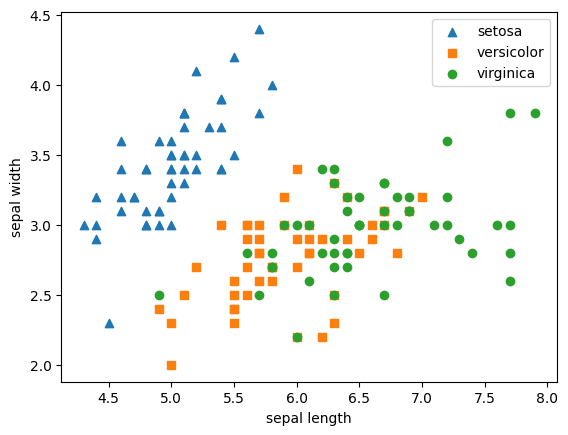

In [3]:
# setosa는 세모, versicolor은 네모, virginica는 동그라미로 표현
markers = ['^', 's', 'o']

# setosa의 target값은 0, versicolor는 1, virginica는 2. 각 target별로 다른 모양의 산점도로 표시
for i, marker in enumerate(markers):
  x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
  y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
  plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

- **PCA는 여러 속성의 값을 연산해야 하므로 압축하기 전에 각 속성값을 동일한 스케일로 변환하는 것이 필요함.**

In [4]:
# Target값을 제외한 모든 속성 값을 StandardScaler을 이용해 표준 정규 분포를 가지는 값들로 변환
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# fit()과 transform()을 호출해 PCA 변환한 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [6]:
# PCA 변환된 데이터의 칼럼명은 각각 pca_component_1, pca_component_2로 명명
pca_columns = ['pca_component_1', 'pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target'] = iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


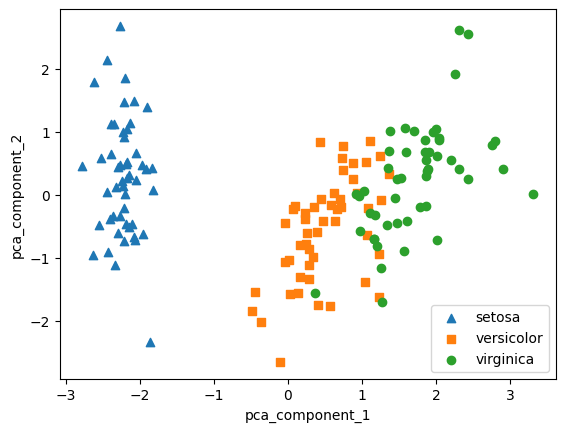

In [7]:
# setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers = ['^', 's', 'o']

# pca_component_1을 x축, pca_component_2를 y축으로 scatter plot 수행
for i, marker in enumerate(markers):
  x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
  y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
  plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

- **PCA Component별로 원본 데이터의 변동성을 얼마나 반영하고 있는지 확인**

In [9]:
# PCA Component별로 원본 데이터의 변동성을 얼마나 반영하고 있는지 확인
## pca_component_1이 전체 변동성의 약 72.9%, pca_component_2가 약 22.8%를 차지함.
## PCA를 2개 요소로만 변환해도 원본 데이터의 변동성 95% 설명 가능.
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


- **원본 데이터 세트, PCA로 변환된 데이터 세트에 각각 분류를 적용하여 정확도 비교**
   - PCA 변환 차원 개수에 따라 예측 성능이 떨어질 수 밖에 없음.

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)
print('원본 데이터 교차 검증 개별 정확도:', scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


In [14]:
## 붓꽃 데이터의 경우 속성 개수가 50% 감소했고, 예측 성능의 정확도는 8% 감소함.
## PCA 변환 후에도 원본 데이터의 특성을 상당 부분 유지하고 있음.
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3)
print('PCA 변환 데이터 교차 검증 개별 정확도:', scores_pca)
print('PCA 변환 데이터 평균 정확도:', np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도: 0.88


**신용카드 고객 데이터 세트(Credit Card Clients Data Set)에 PCA 적용하기**

In [15]:
# header로 의미 없는 첫 행 제거, iloc으로 기존 id 제거
import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/ESAA_YB/Datasets/default of credit card clients.xls', header=1, sheet_name='Data').iloc[0:, 1:]
print(df.shape)
df.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [16]:
# PAY_0 칼럼을 PAY_1으로 칼럼명을 변환하고, 'default payment next month' 칼럼명을 'default'로 변경
df.rename(columns={'PAY_0':'PAY_1', 'default payment next month':'default'}, inplace=True)
y_target = df['default']
X_features = df.drop('default', axis=1)

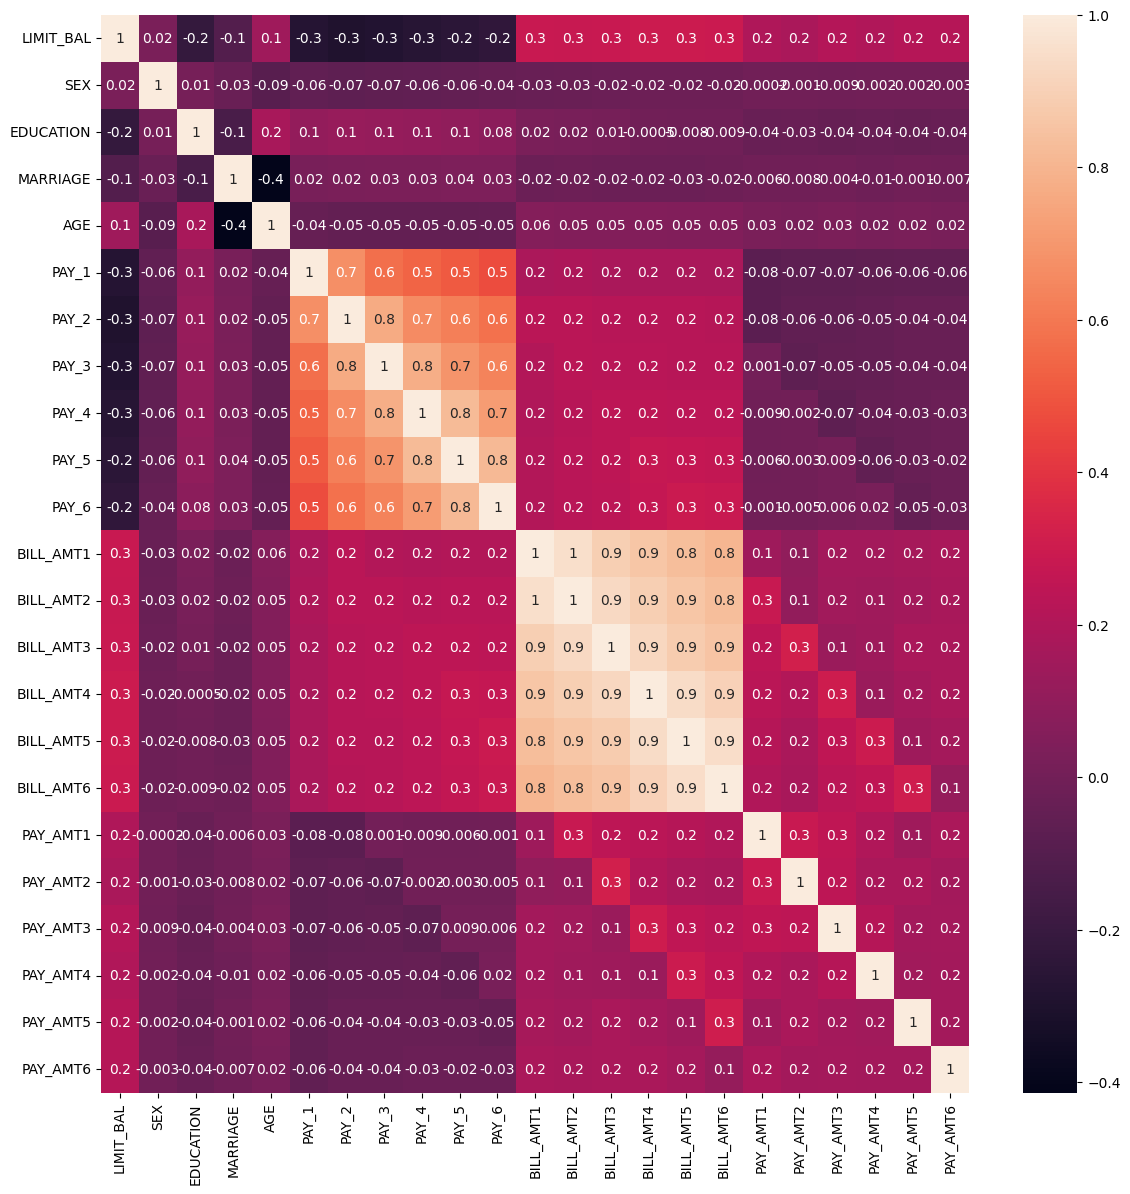

In [17]:
# heatmap으로 23개의 속성 간 상관도 알아보기
## BILL_AMT1 ~ BILL_AMT6 속성끼리의 상관도가 0.9 이상으로 매우 높음. PCA로 이 여섯 개의 속성들을 2개의 component로 변환.
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr, annot=True, fmt='.1g')
plt.show()

- **상관도가 0.9 이상으로 높은 6개의 피처를 2개 컴포먼트를 갖도록 PCA 변환하기**

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# BILL_AMT1 ~ BILL_AMT6까지 6개의 속성명 생성
cols_bill = ['BILL_AMT'+str(i) for i in range(1, 7)]
print('대상 속성명:', cols_bill)

# 2개의 PCA 속성을 가진 PCA 객체를 생성하고, explained_variance_ratio_ 계산을 위해 fit() 호출
## 2개의 PCA components만으로도 6개의 속성의 변동성을 95% 이상 설명 가능.
## 특히 첫번째 PCA 축으로 90%의 변동성 수용 가능. 6개 속성의 상관도가 매우 높다는 의미.
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
print('PCA Component별 변동성:', pca.explained_variance_ratio_)

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성: [0.90555253 0.0509867 ]


- **원본 데이터 세트와 6개의 컴포넌트로 PCA 변환한 데이터 세트의 분류 예측 결과 비교**

In [21]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3)
print('cv=3인 경우의 개별 Fold 세트별 정확도:', scores)
print('평균 정확도', np.round(np.mean(scores), 4))

cv=3인 경우의 개별 Fold 세트별 정확도: [0.8083 0.8196 0.8232]
평균 정확도 0.817


In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터 세트에 먼저 StandardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# 6개의 component를 가진 PCA 변환을 수행하고 cross_val_score()로 분류 예측 수행.
## 전체 23개의 속성의 약 25% 수준인 6개의 PCA 컴포넌트만으로
## 원본 데이터를 기반으로 한 분류 예측결과보다 약 1~2% 정도의 예측 성능 저하만 발생함. (PCA의 뛰어난 압축 능력)
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)
print('cv=3일 경우의 PCA 변환된 개별 Fold 세트별 정확도:', scores_pca)
print('PCA 변환 데이터 세트 평균 정확도:', np.round(np.mean(scores_pca), 4))

cv=3일 경우의 PCA 변환된 개별 Fold 세트별 정확도: [0.7913 0.7972 0.802 ]
PCA 변환 데이터 세트 평균 정확도: 0.7968


###**06-03. LDA (Linear Discriminant Analysis)**

- PCA와 매우 유사함. 차이점은,
   - PCA는 입력 데이터의 **변동성이 가장 큰 축**을 찾는 반면, LDA는 입력 데이터의 **결정 값 클래스를 최대한으로 분리할 수 있는 축**을 찾음. 그를 위해선 클래스 간 분산(between-class scatter)은 최대화, 클래스 내부 분산(within-class scatter)은 최소화하는 방식으로 차원을 축소함.
   - PCA는 **공분산 행렬**에 기반하여 고유벡터를 찾는 반면, LDA는 **클래스 간 분산과 클래스 내부 분산 행렬**을 생성한 뒤, 이 행렬에 기반해 고유벡터를 구하고 입력 데이터를 투영함.
- " 선형 판별 분석법 "
-  사이킷런은 LDA를 LinearDiscriminantAnalysis 클래스로 제공
   ```
   from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  
   ```



In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

In [26]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


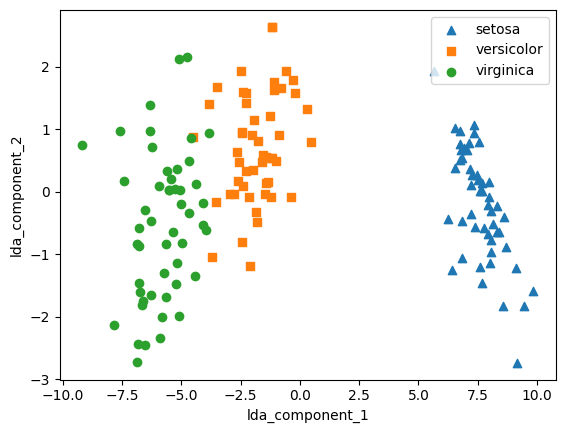

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns = ['lda_component_1', 'lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda, columns=lda_columns)
irisDF_lda['target'] = iris.target

# setosa는 세모, versicolor은 네모, virginica는 동그라미로 표현
markers = ['^', 's', 'o']

# setosa의 target값은 0, versicolor는 1, virginica는 2. 각 target별로 다른 모양으로 산점도 표시.
## LDA로 변환된 데이터 세트와 PCA로 변환된 데이터 세트는 좌우 대칭 형태로 많이 닮아 있음.
for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']

    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

###**06-04. SVD (Singular Value Decomposition)**
- PCA는 기본적으로 SVD 알고리즘으로 구현된 기법. 차이점은,

     - PCA는 정방 행렬(nxn)만을 고유벡터로 분해할 수 있는 반면, SVD는 행과 열의 크기가 다른 행렬에서 적용 가능.

     - PCA는 밀집 행렬(Dense Matrix)에 대한 변환만 가능, SVD는 희소 행렬(Sparse Matrix)에 대한 변환도 가능.


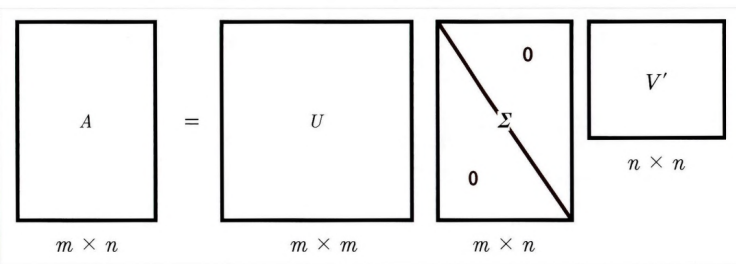

   - 행렬 U와 V에 속한 벡터: 특이벡터(singular vector). 서로 직교하는 성질. 각각 mxm, nxn 차원.
  
   Sigma: 대각행렬. 대각에 위치한 0이 아닌 값이 행렬 A의 특이값. mxn 차원.

- PCA와 SVD는 둘 다 컴퓨터 비전 영역에서 이미지 압축을 통한 패턴 인식과 신호 처리 분야, 텍스트의 토픽 모델링 기법인 LSA(Latent Semantic Analysis)의 기반 알고리즘으로 사용됨.

- " 특이값 분해 "

- 임포트 방법

   ```
   from numpy.linalg import svd   # 넘피
   ```


####**Truncated SVD**

Sigma의 대각원소 중 상위 몇 개만 추출하여 더욱 차원을 줄인 형태로 분할하는 것.



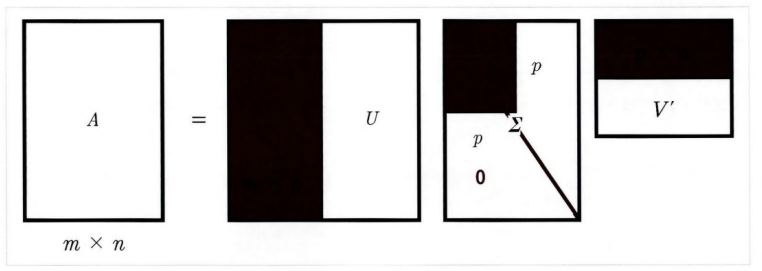

   - A의 차원 mxn, U의 차원 mxp, Sigma의 차원 pxp, transpose(V)의 차원 pxn

- 임포트 방법

   ```
    from scipy.sparse.linalg import svds      # 사이파이
   ```
   
   ```
    from sklearn.decomposition import TruncatedSVD     # 사이킷런의 TruncatedSVD 클래스
   ```  


**데이터 세트 로우 간 의존성이 없는 4x4 행렬에 SVD 적용**

In [28]:
# 넘파이의 svd 모듈 임포드
import numpy as np
from numpy.linalg import svd

# 4x4 랜덤 행렬 a 생성
np.random.seed(121)
a = np.random.randn(4, 4)
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [30]:
# a 행렬에 SVD를 적용해 U, Sigma, Vt 도출
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n', np.round(U, 3))
print('Sigma Value:\n', np.round(Sigma, 3))
print('Vt transpose matrix:\n', np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
Vt transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [31]:
# Sigma를 다시 0을 포함한 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)

# 원본행렬 a와 동일하게 복원됨을 확인
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


**로우 간 의존성이 있는 데이터 세트에 SVD 적용**

In [32]:
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [33]:
# 다시 SVD를 수행해 Sigma 값 확인
## 차원은 같지만 Sigma 값 중 2개가 0으로 변함. 선형 독립인 로우 벡터의 개수가 2개라는 의미. (즉, 행렬의 랭크(Rank)가 2임.)
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n', np.round(Sigma, 3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


In [34]:
# U 행렬의 경우는 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])
# Vt 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)
# U, Sigma, Vt의 내적으로 수행하며, 다시 원본 행렬 복원
## 원본 a 행렬과 완전 동일함.
a_ = np.dot(np.dot(U_, Sigma_), Vt_)
print(np.round(a_, 3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


**6x6 원본 데이터에서 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행**

In [36]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본 행렬을 출력하고 SVD를 적용할 경우 U, Sigma, Vt의 차원 확인
np.random.seed(121)
matrix = np.random.random((6, 6))
print('원본 행렬:\n', matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n 분해 행렬 차원:', U.shape, Sigma.shape, Vt.shape)
print('Sigma값 행렬:\n', Sigma)

# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행.
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\n Truncated SVD 분해 행렬 차원:', U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\n Truncated SVD Sigma값 행렬:\n', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr)   # output of TruncatedSVD

## Truncated SVD로 분해된 행렬로 다시 복원할 경우 완벽하게 복원되진 않고, 근사적으로 복원됨.
print('\n Truncated SVD로 분해 후 복원 행렬:\n', matrix_tr)

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

 분해 행렬 차원: (6, 6) (6,) (6, 6)
Sigma값 행렬:
 [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

 Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

 Truncated SVD Sigma값 행렬:
 [0.55463089 0.83865238 0.88116505 3.2535007 ]

 Truncated SVD로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.7267

**붓꽃 데이터 세트에 사이킷런 TruncatedSVD 클래스를 이용해 변환**

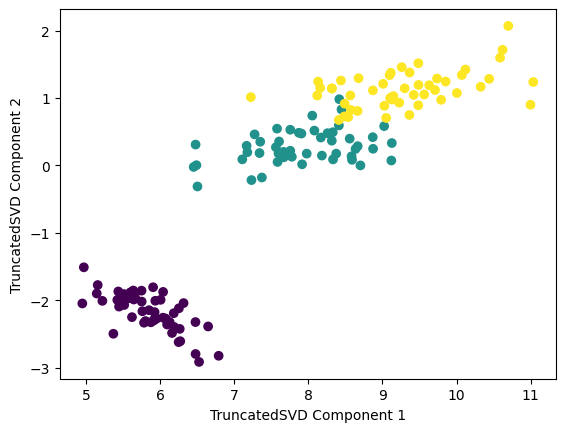

In [37]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
# 2개의 주요 컴포넌트로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

# 산점도 2차원으로 TruncatedSVD 변환된 데이터 표현. 품종은 색깔로 구분
plt.scatter(x=iris_tsvd[:, 0], y=iris_tsvd[:, 1], c=iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')
plt.show()

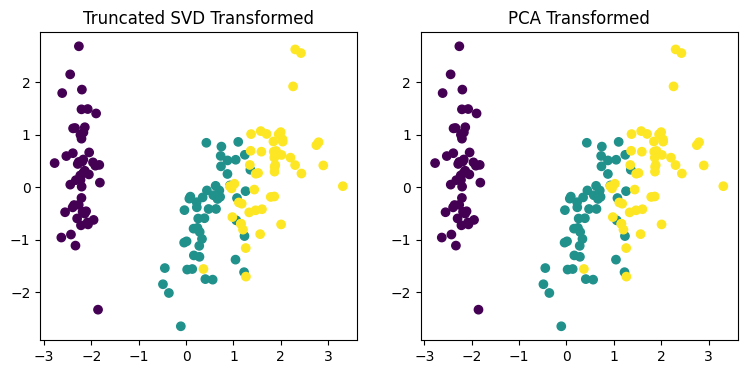

In [39]:
from sklearn.preprocessing import StandardScaler

# 붓꽃 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# TruncatedSVD 변환 데이터를 왼쪽에, PCA 변환 데이터를 오른쪽에 표현
## 붓꽃 데이터를 스케일링한 뒤에 각각 TruncatedSVD, PCA 클래스로 변환한 두 결과가 거의 동일함.
fig, (ax1, ax2) = plt.subplots(figsize=(9, 4), ncols=2)
ax1.scatter(x=iris_tsvd[:, 0], y=iris_tsvd[:, 1], c=iris.target)
ax2.scatter(x=iris_pca[:, 0], y=iris_pca[:, 1], c=iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')
plt.show()

In [40]:
## 두 개의 변환 행렬 값과 원본 속성별 컴포넌트 비율값은 서로 거의 동일함.
print((iris_pca - iris_tsvd).mean())
print((pca.components_ - tsvd.components_).mean())

2.351238416927378e-15
-4.85722573273506e-17


###**06-05. NMF (Non-Negative Matrix Factorization)**

원본 행렬 내의 모든 원소 값이 양수라는 것이 보장되면 다음과 같은 두 개의 기반 양수 행렬로 분해될 수 있는 기법.


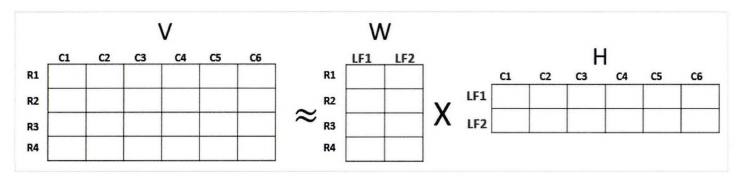


   - 분해 행렬 W : 원본 행에 대해서 잠재 요소의 값을 대응

     분해 행렬 H : 이 잠재 요소가 원본 열(원본 속성)로 어떻게 구성됐는지를 나타냄



- NMF와 SVD는 둘다
   - 매우 많은 피처 데이터를 가진 고차원 행렬을 두 개의 저차원 행렬로 분리하는 행렬 분해 (Matrix Factorization) 기법.
   - 행렬 분해를 수행하면서 잠재 요소를 도출하기 때문에,
     
     이미지 압축을 통한 패턴 인식, 텍스트의 토픽 모델링, 문서 유사도 및 클러스터링, 잠재 요소(Latent Factoring) 기반의 추천 방식을 통해 추천(Recommendations) 시스템에 활발하게 응용됨.

- NMF는 Truncated SVD와 같이 낮은 랭크를 통한 행렬 근사(Low-Rank Approximation) 방식의 변형.

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


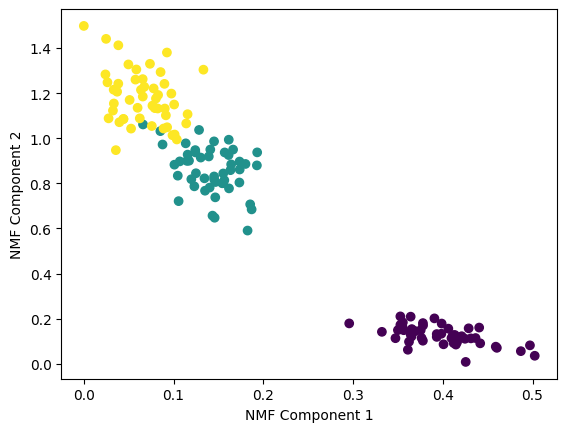

In [42]:
# 붓꽃 데이터를 NMF를 이용해 2개의 컴포넌트로 변환한 후 시각화
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:, 0], y=iris_nmf[:, 1], c=iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')
plt.show()